In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [182]:
df_feat = pd.read_csv("raw_features.csv",index_col=0,parse_dates=True)
returns = pd.read_csv("raw_response.csv",index_col=0,parse_dates=True)
df_feat.dropna(inplace=True)

scaler = StandardScaler()

In [183]:
df_feat.tail()

3M_Rate  10Y_2Y_Curve  5y5y_Forward  Core_PCE    NFP  UnEmp  \
2019-08-01     1.95      0.055000      1.765909  0.001332  207.0    3.7   
2019-09-01     1.89      0.051500      1.834000  0.000518  208.0    3.5   
2019-10-01     1.65      0.155455      1.888636  0.001267  185.0    3.6   
2019-11-01     1.54      0.199474      1.984737  0.000544  261.0    3.5   
2019-12-01     1.54      0.249524      2.043333  0.002333  184.0    3.5   

            Hstarts        IP   ISM  Mich_Sent  Mich_Inf       CPI  
2019-08-01   1377.0  0.007050  48.8       89.8       2.7  0.002250  
2019-09-01   1274.0 -0.003476  48.2       93.2       2.8  0.001900  
2019-10-01   1340.0 -0.004070  48.5       95.5       2.5  0.001152  
2019-11-01   1371.0  0.009280  48.1       96.8       2.5  0.001940  
2019-12-01   1587.0 -0.003509  47.8       99.3       2.3  0.001247

In [184]:
df_feat['5y5y.3m'] = (df_feat['5y5y_Forward'] - df_feat['3M_Rate'])

c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.ro

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002313B95CA90>,
      dtype=object)

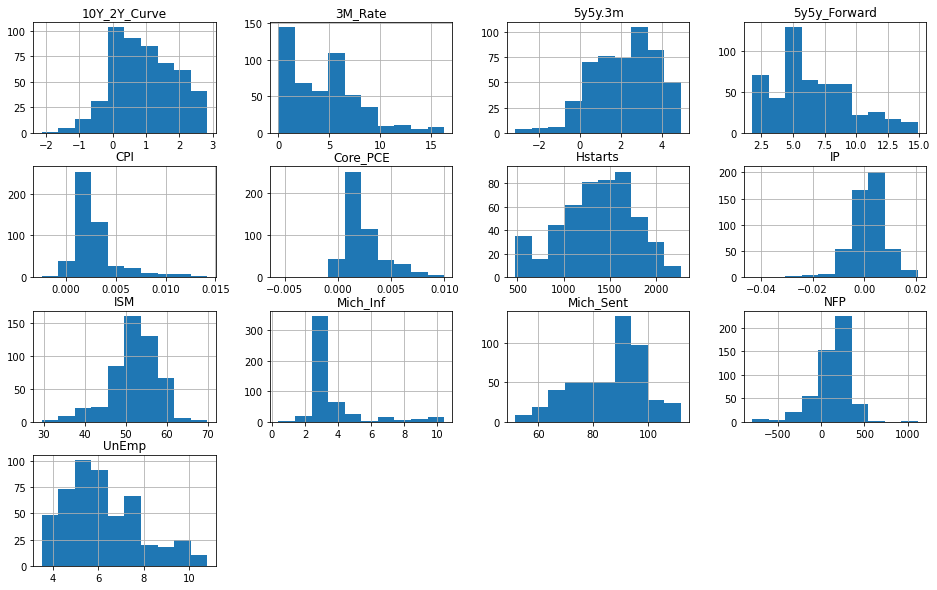

In [185]:
df_feat.hist(figsize=(16,10))

In [186]:
#build Z-score function to normalize current change to custom historical period
def z_score(x):
    x = np.array(x)
    z = (x[-1] - x.mean())/x.std()
    return z

In [187]:
X_scaled2 = df_feat.copy()
X_scaled2['lunemp'] = np.log(df_feat['UnEmp'])
X_scaled2.drop(['UnEmp'],axis=1,inplace=True)
X_scaled2= pd.DataFrame(scaler.fit_transform(X_scaled2.dropna()),columns=X_scaled2.columns,index=X_scaled2.index)

df2 = X_scaled2.rolling(36).apply(z_score).dropna()

df_all = X_scaled2.join(df2,rsuffix='_36mZ').dropna()




c:\users\mattk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


In [64]:
# df3 = df2.dropna().copy()
# df3 = df3-df3.shift(1)

In [65]:
# df_all = X_scaled.join(df2,rsuffix='_36mZ').dropna()
# df_all = df_all.join(df3,rsuffix='_changeZ').dropna()

In [188]:
df_all.head()

3M_Rate  10Y_2Y_Curve  5y5y_Forward  Core_PCE       NFP  \
1981-01-01  2.923102     -1.750874      1.880165  3.316864 -0.212631   
1981-02-01  2.859565     -1.783853      2.079076  2.612643 -0.299608   
1981-03-01  2.464527     -1.491342      2.029175  1.667679 -0.140150   
1981-04-01  2.555689     -1.511987      2.206714  2.125611 -0.294776   
1981-05-01  3.276703     -2.465354      2.273855  2.369765 -0.584701   

             Hstarts        IP       ISM  Mich_Sent  Mich_Inf  ...  \
1981-01-01  0.435801 -1.097857 -0.490657  -1.180362  3.543033  ...   
1981-02-01 -0.322085 -0.929026 -0.559620  -1.536453  3.006116  ...   
1981-03-01 -0.171012  0.550512 -0.421694  -1.568105  2.170913  ...   
1981-04-01 -0.035045 -0.907460 -0.076880  -1.101231  2.648172  ...   
1981-05-01 -0.588982  0.649235  0.250693  -0.792619  2.230570  ...   

            Core_PCE_36mZ  NFP_36mZ  Hstarts_36mZ   IP_36mZ  ISM_36mZ  \
1981-01-01       1.251023 -0.394165     -0.367478 -0.784175 -0.313611   
1981-02-01       0.381646 -0.441861     -1.214862 -0.636700 -0.338168   
1981-03-01      -0.778549 -0.252438     -0.980673  0.445522 -0.225899   
1981-04-01      -0.215513 -0.351897     -0.775329 -0.569293  0.031906   
1981-05-01       0.066031 -0.615932     -1.378300  0.622357  0.285809   

            Mich_Sent_36mZ  Mich_Inf_36mZ  CPI_36mZ  5y5y.3m_36mZ  lunemp_36mZ  
1981-01-01        0.208328       0.633432 -0.864708     -1.670168     1.574015  
1981-02-01       -0.269944      -0.109363 -0.896660     -1.095122     1.365704  
1981-03-01       -0.282318      -1.296860 -0.900246     -0.281923     1.292546  
1981-04-01        0.495189      -0.687203 -0.507397     -0.111058     0.991571  
1981-05-01        1.053239      -1.318851  0.230822     -1.546538     1.278290  

[5 rows x 26 columns]

In [189]:
df_all.shape

(468, 26)

In [190]:
returns = returns[df_all.index[0]:]

In [191]:
df_feat_train = df_all.loc[:'2005',:]
df_feat_test = df_all.loc['2006':,:]

returns_train = returns.loc[:'2005',:]
returns_test = returns.loc['2006':,:]

In [192]:
df_feat_train.to_csv('processed_features_train_exp.csv')
df_feat_test.to_csv('processed_features_test_exp.csv')

returns_train.to_csv('processed_returns_train_exp.csv')
returns_test.to_csv('processed_returns_test_exp.csv')